In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
import os.path
import os,re
import glob
import pprint
import pathlib
import threading
import time
import joblib
from pandas import DataFrame
from datetime import datetime,timedelta
import datetime
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
import joblib
from tensorflow import keras
from sklearn.utils import shuffle

In [4]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/Hancom Gothic Regular.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False

In [5]:
plt.rcParams['axes.unicode_minus'] = False
get_ipython().run_line_magic('config', "InlineBackend.figure_format='retina'")

### F.P.MCPL Data for DNN 

In [7]:
new_data = pd.read_csv(r'H:\연구실\2022진동_졸업논문정리\new_data.csv',index_col=0)

In [8]:
# X,Y
x = new_data.iloc[:,0:6000]
y = new_data.iloc[:,6002:].values

In [9]:
# Train Test Split
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=0.3, random_state=1, stratify = y)

### DNN_Model2

In [11]:
# data : 500 data per each state and capacity 


# model2 = 128,64,32
dnn_model2 = tf.keras.Sequential()
dnn_model2 .add(tf.keras.layers.Dense(128, activation='relu', input_shape=[6000]))
dnn_model2 .add(tf.keras.layers.Dense(64, activation='relu'))
dnn_model2 .add(tf.keras.layers.Dense(32, activation='relu'))
dnn_model2 .add(tf.keras.layers.Dense(37, activation='softmax'))

optimizer = tf.keras.optimizers.Adam()
dnn_model2 .compile(optimizer=optimizer,
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 

In [12]:
dnn_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768128    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 37)                1221      
                                                                 
Total params: 779,685
Trainable params: 779,685
Non-trainable params: 0
_________________________________________________________________


In [13]:
checkpoint_path = "dnn_model2.ckpt" 
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True, 
                                                 monitor='val_loss', 
                                                 verbose=1)

# 새로운 콜백으로 모델 훈련하기
hist = dnn_model2.fit(train_x, 
          train_y,  
          epochs=32,batch_size = 16,
          validation_data=(val_x,val_y),
          callbacks=[cp_callback]) 

Epoch 1/32
805/810 [============================>.] - ETA: 0s - loss: 2.4997 - accuracy: 0.2557
Epoch 1: val_loss improved from inf to 1.48878, saving model to dnn_model2.ckpt
810/810 [==============================] - 5s 6ms/step - loss: 2.4943 - accuracy: 0.2577 - val_loss: 1.4888 - val_accuracy: 0.5332
Epoch 2/32
806/810 [============================>.] - ETA: 0s - loss: 0.9514 - accuracy: 0.7359
Epoch 2: val_loss improved from 1.48878 to 0.53615, saving model to dnn_model2.ckpt
810/810 [==============================] - 4s 5ms/step - loss: 0.9497 - accuracy: 0.7364 - val_loss: 0.5361 - val_accuracy: 0.8804
Epoch 3/32
801/810 [============================>.] - ETA: 0s - loss: 0.3734 - accuracy: 0.9319
Epoch 3: val_loss improved from 0.53615 to 0.20684, saving model to dnn_model2.ckpt
810/810 [==============================] - 4s 5ms/step - loss: 0.3718 - accuracy: 0.9323 - val_loss: 0.2068 - val_accuracy: 0.9850
Epoch 4/32
809/810 [============================>.] - ETA: 0s - loss: 0

810/810 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9992  
Epoch 28: val_loss did not improve from 0.00369
810/810 [==============================] - 4s 5ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.1381 - val_accuracy: 0.9488
Epoch 29/32
808/810 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.9987
Epoch 29: val_loss did not improve from 0.00369
810/810 [==============================] - 4s 5ms/step - loss: 0.0061 - accuracy: 0.9987 - val_loss: 0.0039 - val_accuracy: 0.9995
Epoch 30/32
805/810 [============================>.] - ETA: 0s - loss: 3.2695e-04 - accuracy: 1.0000
Epoch 30: val_loss did not improve from 0.00369
810/810 [==============================] - 4s 5ms/step - loss: 3.2627e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 0.9995
Epoch 31/32
810/810 [==============================] - ETA: 0s - loss: 5.4514e-04 - accuracy: 1.0000
Epoch 31: val_loss did not improve from 0.00369
810/810 [================

In [14]:
dnn_model2.save('dnn_model2.h')

INFO:tensorflow:Assets written to: dnn_model2.h\assets


INFO:tensorflow:Assets written to: dnn_model2.h\assets


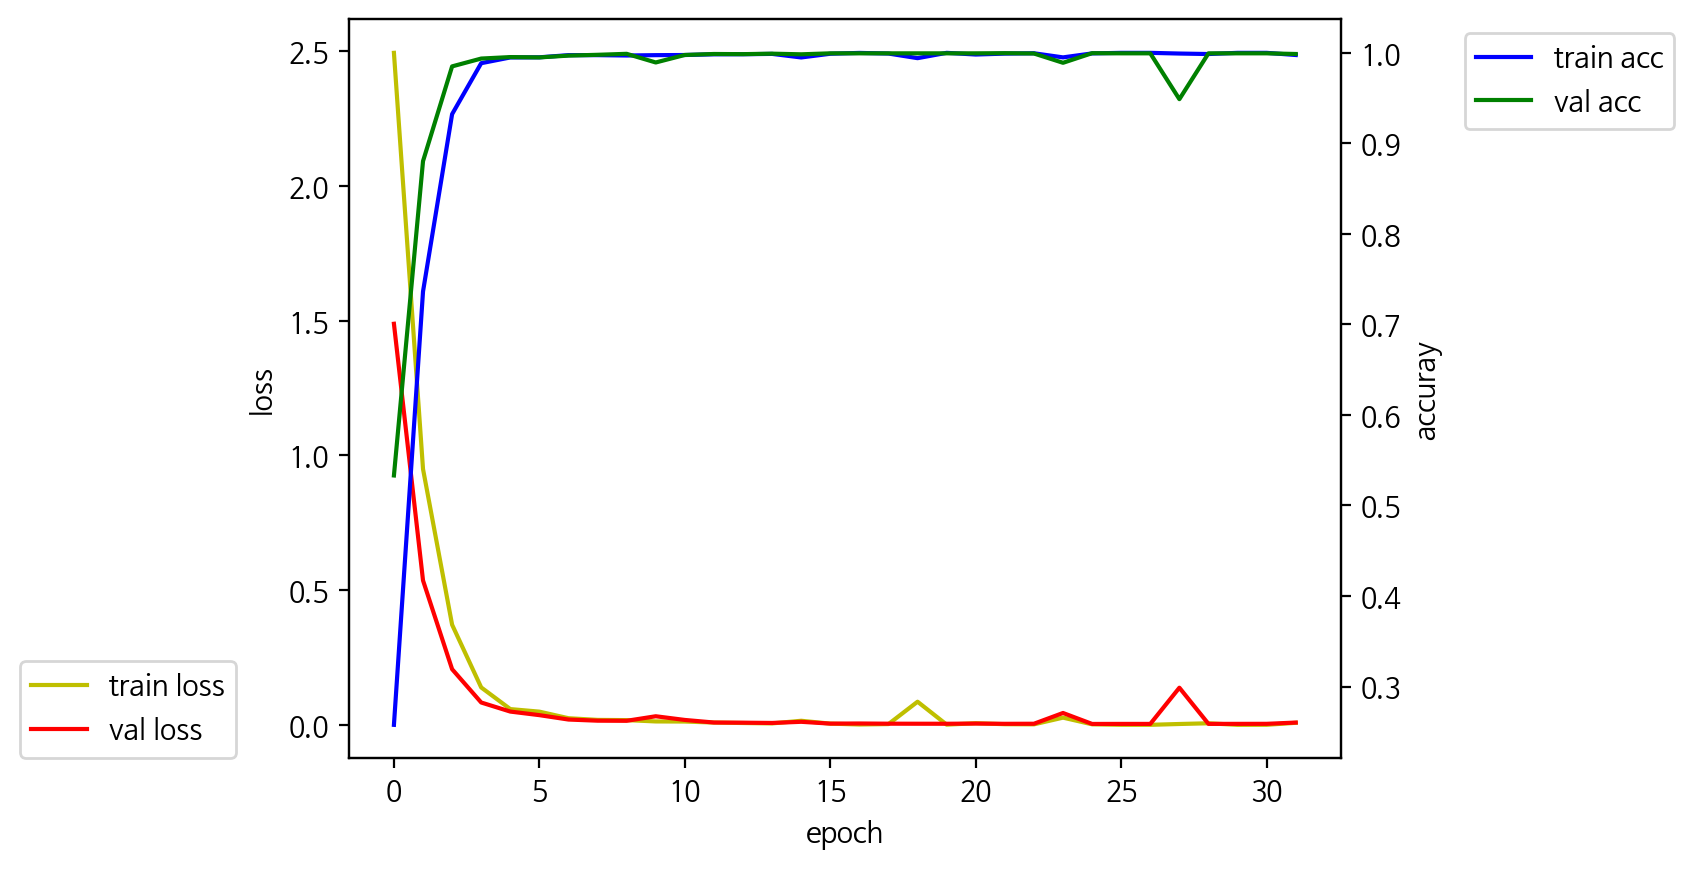

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(bbox_to_anchor=(-0.1,0.15))
acc_ax.legend(bbox_to_anchor=(1.35,1))

plt.savefig(r'Z:\Subi\BDJ_DNN\DNN_Model2.png')
plt.show()

In [16]:
val_pred = dnn_model2.predict(val_x)
accuracy = dnn_model2.evaluate(val_x,val_y)

174/174 [==============================] - 0s 913us/step - loss: 0.0088 - accuracy: 0.9987


In [17]:
dnn_model2.evaluate(train_x,train_y)

405/405 [==============================] - 0s 883us/step - loss: 0.0025 - accuracy: 0.9998


[0.0025298886466771364, 0.999845564365387]